In [65]:
from matplotlib import pyplot as plt
import numpy as np

In [66]:
import random
import pylab

# Global Variables
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 500
CURRENTFOXPOP = 30

def rabbitGrowth():
    """ 
    rabbitGrowth is called once at the beginning of each time step.

    It makes use of the global variables: CURRENTRABBITPOP and MAXRABBITPOP.

    The global variable CURRENTRABBITPOP is modified by this procedure.

    For each rabbit, based on the probabilities in the problem set write-up, 
      a new rabbit may be born.
    Nothing is returned.
    """
    # you need this line for modifying global variables
    global CURRENTRABBITPOP

    # TO DO
    if CURRENTRABBITPOP >= MAXRABBITPOP:
      return None
    p_newrabbit = 1 - (CURRENTRABBITPOP / MAXRABBITPOP)
    for rabbit in range(CURRENTRABBITPOP):
      if p_newrabbit > random.random():
        CURRENTRABBITPOP += 1
            
def foxGrowth():
    """ 
    foxGrowth is called once at the end of each time step.

    It makes use of the global variables: CURRENTFOXPOP and CURRENTRABBITPOP,
        and both may be modified by this procedure.

    Each fox, based on the probabilities in the problem statement, may eat 
      one rabbit (but only if there are more than 10 rabbits).

    If it eats a rabbit, then with a 1/3 prob it gives birth to a new fox.

    If it does not eat a rabbit, then with a 1/10 prob it dies.

    Nothing is returned.
    """
    # you need these lines for modifying global variables
    global CURRENTRABBITPOP
    global CURRENTFOXPOP

    # TO DO
    if CURRENTRABBITPOP <= 10:
      return None
    p_fox_hunts = CURRENTRABBITPOP / MAXRABBITPOP
    for fox in range(CURRENTFOXPOP):
      if CURRENTRABBITPOP > 10 and p_fox_hunts > random.random():  # hunt successful
        CURRENTRABBITPOP -= 1
        if (1/3) > random.random():
          CURRENTFOXPOP += 1
      else:  # hunt fails
        if CURRENTFOXPOP > 10 and 0.1 > random.random():
          CURRENTFOXPOP -= 1
    
    
            
def runSimulation(numSteps):
    """
    Runs the simulation for `numSteps` time steps.

    Returns a tuple of two lists: (rabbit_populations, fox_populations)
      where rabbit_populations is a record of the rabbit population at the 
      END of each time step, and fox_populations is a record of the fox population
      at the END of each time step.

    Both lists should be `numSteps` items long.
    """
    rabbit_populations = []
    fox_populations = []
    # TO DO
    for step in range(numSteps):
      rabbitGrowth()
      foxGrowth()
      rabbit_populations.append(CURRENTRABBITPOP)
      fox_populations.append(CURRENTFOXPOP)
      
    return (rabbit_populations, fox_populations)

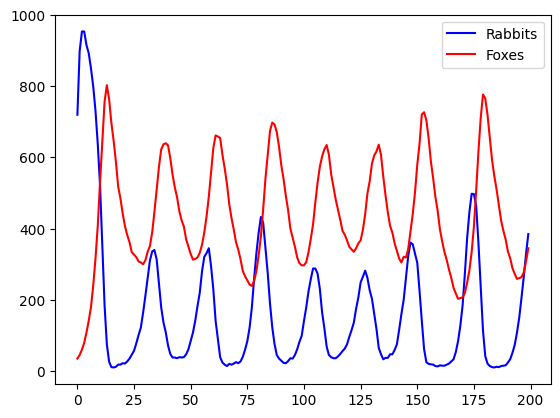

In [67]:

r, f = runSimulation(200)

plt.plot(r, color="b", label="Rabbits")
plt.plot(f, color="r", label="Foxes")
plt.legend()

[ 2.28260111e-02 -5.48235596e+00  4.14521400e+02]


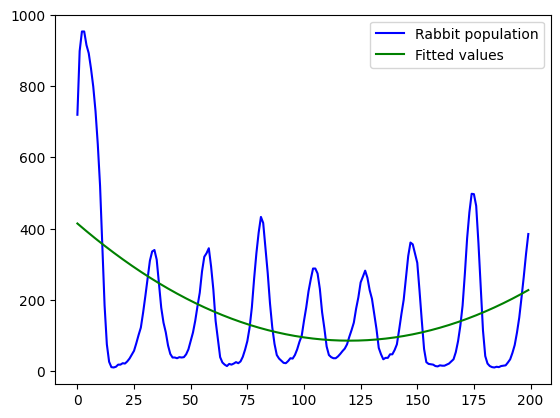

In [68]:
# quadratic polynomial regression coefficients for rabbit population over time,
# where timestep index is the predictor variable and rabbit population is the dependent variable
coeff_r = np.polyfit(range(len(r)), r, 2)
print(coeff_r)
plt.figure()
fitted_r = coeff_r[2] + coeff_r[1] * np.array(range(len(r))) + coeff_r[0] * np.array(range(len(r)))**2
plt.plot(r, color="b", label="Rabbit population")
plt.plot(fitted_r, color="green", label="Fitted values")
plt.legend()

[-1.06277927e-02  2.18079289e+00  3.58964002e+02]


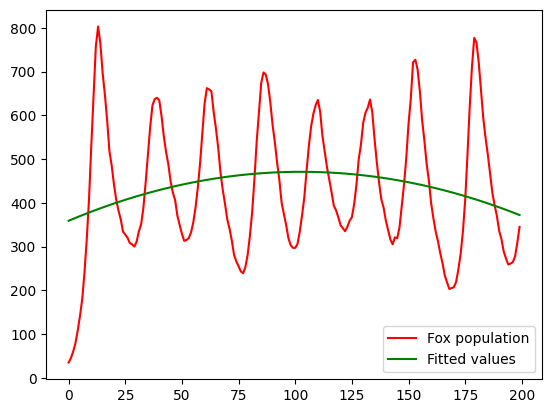

In [69]:
# quadratic polynomial regression coefficients for fox population over time,
# where timestep index is the predictor variable and rabbit population is the dependent variable
coeff_f = np.polyfit(range(len(f)), f, 2)
print(coeff_f)
plt.figure()
fitted_f = coeff_f[2] + coeff_f[1] * np.array(range(len(f))) + coeff_f[0] * np.array(range(len(f)))**2
plt.plot(f, color="r", label="Fox population")
plt.plot(fitted_f, color="green", label="Fitted values")
plt.legend()